# Lab 7 - Dynamic Programming - Power Plant

<b>Information on group members:</b><br>
1) 160306, Piotr Franc <br>
2) 160288, Paweł Charkiewicz

In [2]:
%matplotlib inline

from sympy.interactive import printing
printing.init_printing(use_latex=True)

import matplotlib.pyplot as plt
import sympy as sym
from sympy import *
import numpy as np

This exercise is inspired by Ex. 2 in the Exercises.pdf file. You have to set operating levels for a power plant for consecutive two-months in a way that minimizes the operating costs (using dynamic programming). Before going to the exercise, it is recommended to get acquainted with a Python library for symbolic calculations - SymPy, which can be particularly helpful for solving this task. 

# Mini tutorial on SymPy

SymPy is a library for performing symbolic calculations instead of numerical. It allows defining symbols, functions, expressions, equations and performing various operations on them. The examples of such operations that can help solve this exercise are given below. Note that due to lines: <br><br>
from sympy.interactive import printing <br>
printing.init_printing(use_latex=True)  <br><br>
located in the first cell of this notebook, the symbols can be printed using latex, improving hence readability

<b> Defining symbols: </b>

In [3]:
z1, z2 = symbols("z1 z2")
# or z = symbols("z1 z2")

<b> Printing a symbol using Latex: </b>

In [4]:
z1

<b> Defining an expression: </b>

In [5]:
2*z1 + (10-z2)**2

<b>Expanding the expression:</b>

In [6]:
expand(2*z1 + (10-z2)**2)

<b> Simplifying the expression:</b>

In [7]:
e = simplify(expand(2*z1 + (10-z2)**2 - (5+z1)**2))
e

<b> Substituting a variable with a value in the expression:</b>

In [8]:
e = 2*z1 + (10-z1)**2
v = e.evalf(subs={z1: 10})
print(v)

20.0000000000000


<b> Substituting a variable with another variable or value:</b>

In [9]:
e = 2*z1 + (10-z2)**2
e.subs(z2, z1)

<b> Finding a (partial) derivative: </b>

In [10]:
e = 2*z1 + (10-z2)**2
d = diff(e, z2)
d

<b> Solving an equation: </b>

In [11]:
e = 2*z1 + (10-z2)**2
d = diff(e, z2)
v = solve(Eq(d, 0), z2)
print(v)

[10]


# Exercise

Below given is the data. In contrast to the exercise shown in the Exercise.pdf file, note that all pairs of all 12 months are considered stages in this notebook. 

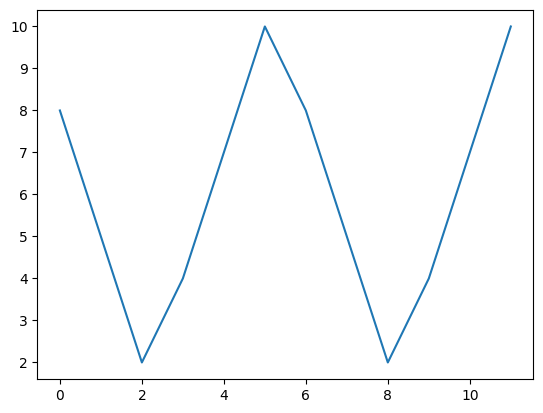

In [12]:
months = ["Jan-Feb", "Mar-Apr", "May-Jun", "Jul-Aug", "Sep-Oct", "Nov-Dec"]

### min requested operating level (1-10) + allowable bounds 
request = [8,5,2,4,7,10]
bounds = [[request[i], 10] for i in range(6)]

plt.plot([i for i in range(12)], request + request, label='linear')
plt.show()

<b> Cost: </b> Working above the required level - cost in a generic form:

In [13]:
xi, ri, mi1 = symbols("x_i r_i m_{i1}") 
cost_above = mi1*(xi-ri)
cost_above #mi1 = multiplicator, #xi = operating level #ri = requirement (lower bound)

You can do c = cost_above.copy() and then c.subs, replacing variables with values (m, p, r) or other variables (r): 

In [14]:
x1 = symbols("x1")
c = cost_above.copy()
c = c.subs(xi, x1)
c = c.subs(mi1, 1)
c = c.subs(ri, 100)
c

Below are provided m parameter values for each month:

In [15]:
mv1 = [2, 8, 10, 12, 10, 6]

<b> Cost: </b> Chaging the operating level - cost in a generic form:

In [16]:
si, mi2, pi = symbols("s_{i} m_{i2} p_i") 
cost_change = mi2*(xi-si)**pi
cost_change #mi2 = multiplicator, #pi = exponent #xi = operating level (i-th month) #s_{i} = state: operating level ((i-1)-th month)
cost_change

Below are provided m and p parameter values for each month:

In [17]:
mv2 = [6, 4, 1, 1, 3, 5]
pv = [2, 2, 2, 2, 2, 2]

# Solution:

Apart from finding optimal operating levels for each month, plot these values along with the lower bounds for each month in order to show how they change in time.<br><br>Hints:<br>
- the optimal cost = 135.42<br>
- there is no situation when the minima for first derivatives are outside allowable bounds (but test it anyway)<br><br>

After obtaining and plotting the solution, check what would happen is you change the mv1[2] parameter to 5. 

In [18]:

def calculate_cost_above(expression, x, mi, bound):
    c = expression.copy()
    c = c.subs(xi, x)
    c = c.subs(mi1, mi)
    c = c.subs(ri, bound)
    return c

def calculate_cost_change(expression, x, m2, s, p):
    c = expression.copy()
    c = c.subs(xi, x)
    c = c.subs(mi2, m2)
    c = c.subs(si, s)
    c = c.subs(pi, p)
    return c

# mv1 = [2, 8, 10, 12, 10, 6]
# mv1[2] = 5

[0, 167*s1/177 - 887/1062, 152*s2/167 - 180/167, 23*s3/38 - 14/19, 8*s4/23 + 87/23, 3*s5/8 + 45/8, 10, 0]
[8.599811676082863, 6.749529190207157, 3.3483992467043318, 4.947269303201507, 7.480225988700565, 10]


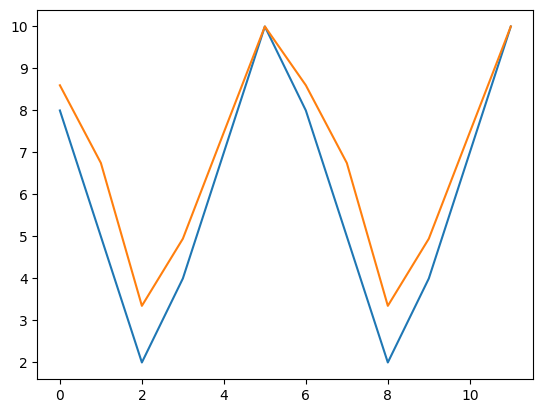

In [ ]:
F = [0 for i in range(8)]
F_original = [0 for i in range(8)]
min_X = [0 for i in range(8)]
X = [symbols("x{}".format(i)) for i in range(8)]
S = [symbols("s{}".format(i)) for i in range(8)]
for i in range(6,0,-1):
    lo_bound = bounds[i-1][0]
    hi_bound = bounds[i-1][1]
    c_above = calculate_cost_above(cost_above.copy(), X[i], mv1[i-1], lo_bound)
    c_change = calculate_cost_change(cost_change.copy(), X[i], mv2[i-1], S[i], pv[i-1])
    if i == 6:
        #bc we know X[6] = 10 and F[7] = 0
        F[i] = simplify(expand(c_above + c_change)).subs(X[i], 10)
    else:
        F[i] = simplify(expand(c_above + c_change + F[i+1].subs(S[i+1], X[i])))
    diff_zero = solve(Eq(diff(F[i], X[i]), 0), X[i])
    if len(diff_zero) == 0:
        min_X[i] = hi_bound
    else:
        min_X[i] = diff_zero[0]
    F_original[i] = F[i]
    F[i] = F[i].subs(X[i], min_X[i])
    if i!=6:
        if min_X[i].subs(S[i], bounds[i][1])<lo_bound or min_X[i].subs(S[i], bounds[i][0])>hi_bound:
            print("Error: x out of bound")
    # print(min_X[i])
    # print(F[i])
    # print("-----")


print(min_X)
solution = float(F[1].subs(S[1], 10))
X_solutions = [0 for i in range(7)]
X_solutions[1] = float(min_X[1].subs(S[1], 10))
X_solutions[6] = 10
for i in range(2,6):
    X_solutions[i] = float(min_X[i].subs(S[i], X_solutions[i-1]))


print(X_solutions[1:7])


plt.plot([i for i in range(12)], request + request, label='linear')
plt.plot([i for i in range(12)], X_solutions[1:7] + X_solutions[1:7], label='optimized')
plt.show()
